This neural network class incorporates all the necessary components to create, train, and evaluate the network.
It is fixed for 3 layers as that is what the assignment required, but it could be extended to multiple layers easily, by iteratively creating the hidden layers and its weights and biases.

The weights are stored as matrices, which make the operations in the backpropagation and feedforward much easier.

For the activation function, the sigmoid was used.

The feedforward method is then quite simple, it takes the dot product between the input and the first set of weights, and adds the corresponding biases.
These values go through the activation function, and then we take the dot product between those values and the second set of weights, and add the biases.

The output is again put through the activation function and is returned.

The train method, which contains the backpropagation, is the most complex part.

First of all, we decided to train in batches. Each training instance is trained during each epoch, and the weights and biases are updated for all instances at once.

The training set is created using np.eye(8), which creates the following matrix:

1 0 0 0 0 0 0 0
0 1 0 0 0 0 0 0
0 0 1 0 0 0 0 0
0 0 0 1 0 0 0 0
0 0 0 0 1 0 0 0
0 0 0 0 0 1 0 0
0 0 0 0 0 0 1 0
0 0 0 0 0 0 0 1

Then we get the output using the feedforward method, and calculate the error.

First we calculate the gradient of the output layer, which is the error times the output through the derivative of the activation function.
Then we calculate how much the hidden layer output weights contributed to the error, which is the dot product of the output gradient with the transposed matrix of weights between the hidden and output layer.
The next line calculates the output of the hidden layer during the forward pass, which is used in the line after.
The last line calculates the derivative of the hidden layer which is calculated by multiplying the error in the hidden layer with the output of itself through the derivative of the sigmoid.

Then these values are used to update the weights and biases.

The weight updates between the hidden and output layer are done by performing a matrix multiplication between the transpose of the hidden layer outputs and the gradient of the error at the output layer. The result is then scaled by the learning rate to keep the updates small.

The biases for the output are similarly updated to the weights but without the previous layer's output. The error gradient for the output layer is summed across all training examples, giving a single bias adjustment for each output neuron.

The weights between the input to the hidden layer are based on the input data itself and the gradient of the error propagated back from the hidden layer. It is done by taking the dot product of the input data transposed and the hidden layer's error gradient,.

The biases for the hidden layer are again similarly updated, the sum of the gradient of the error at the hidden layer gives the total adjustment needed for each neuron's bias in the hidden layer.

The evaluations are done by testing each example. It must be noted that it was evaluated through number of errors made, and that the outputs were interpreted first.
This means that we change the output to binary form: the largest value is turned to 1 and all others are 0.




In [78]:
import numpy as np
import matplotlib.pyplot as plt
import time

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        #Initialize layer sizes and learning rate
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        #Initialize weights and biases, as matrices.  allows for easy matrix operations
        self.weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
        self.weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))
        self.bias_hidden = np.random.uniform(-1, 1, (1, hidden_size))
        self.bias_output = np.random.uniform(-1, 1, (1, output_size))

    #Sigmoid function
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    #Derivative of sigmoid, x instead of sigmoid(x) as we pass the activations and not the values
    def sigmoid_derivative(self, x):
        return x * (1 - x)

    #Feedforward method, simply calculates values with weights and adds biases for each layer
    def feedforward(self, X):
        hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        hidden_layer_output = self.sigmoid(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output) + self.bias_output
        predicted_output = self.sigmoid(output_layer_input)
        return predicted_output

    #backpropagation method
    def train(self, epochs, batch_size):
        for epoch in range(epochs):
            #Generate test data for each epoch
            #It simply makes an 8x8 matrix of zeros with a 1 on the diagonal,
            #meaning that each test case is in each epoch
            #and the gradient descent is applied in batches
            indices = np.random.choice(self.input_size, batch_size, replace=False)
            X = np.eye(self.input_size)[indices]

            #Get output
            predicted_output = self.feedforward(X)

            #Calculate error
            error = X - predicted_output

            #Backward propagation
            d_predicted_output = error * self.sigmoid_derivative(predicted_output)
            error_hidden_layer = d_predicted_output.dot(self.weights_hidden_output.T)
            hidden_layer_output = self.sigmoid(np.dot(X, self.weights_input_hidden) + self.bias_hidden)
            d_hidden_layer = error_hidden_layer * self.sigmoid_derivative(hidden_layer_output)

            #Updating the weights biases
            self.weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * self.learning_rate
            self.bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * self.learning_rate
            self.weights_input_hidden += X.T.dot(d_hidden_layer) * self.learning_rate
            self.bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * self.learning_rate

    def test_all_cases(self):
        correct_predictions = 0
        for i in range(self.input_size):
            #Creates a vector where one of the indices is 1 and all others are 0
            input_vector = np.zeros((1, self.input_size))
            input_vector[0, i] = 1

            #Get the output from the NN
            output_vector = self.feedforward(input_vector)

            #Convert output to binary (largest value is 1, all others are 0)
            one_hot_output = np.zeros_like(output_vector)
            one_hot_output[0, np.argmax(output_vector)] = 1

            #Check if they are equal
            if np.array_equal(one_hot_output, input_vector):
                correct_predictions += 1
        #Return number of mistakes
        return 8-correct_predictions

This shows experiment 1, showing the error after each 200 epochs. For each number of epochs, the network is trained 100 times from scratch, and the average number of mistakes over those 100 times are returned as the error.
Error is not defined as loss but as # number of predictions (after binarization of the output).

This shows that when the number of epochs are large enough, we do not need to get lucky with the weight initializations. However then the number of epochs are smaller, the initial weights will have an impact on the performance of the network.

Note that each epoch contains 8 test cases.
Towards 3000, the error becomes practically zero.


Epochs: 1, Average Error str(average_error)
Epochs: 201, Average Error str(average_error)
Epochs: 401, Average Error str(average_error)
Epochs: 601, Average Error str(average_error)
Epochs: 801, Average Error str(average_error)
Epochs: 1001, Average Error str(average_error)
Epochs: 1201, Average Error str(average_error)
Epochs: 1401, Average Error str(average_error)
Epochs: 1601, Average Error str(average_error)
Epochs: 1801, Average Error str(average_error)
Epochs: 2001, Average Error str(average_error)
Epochs: 2201, Average Error str(average_error)
Epochs: 2401, Average Error str(average_error)
Epochs: 2601, Average Error str(average_error)
Epochs: 2801, Average Error str(average_error)
Epochs: 3001, Average Error str(average_error)
Epochs: 3201, Average Error str(average_error)
Epochs: 3401, Average Error str(average_error)


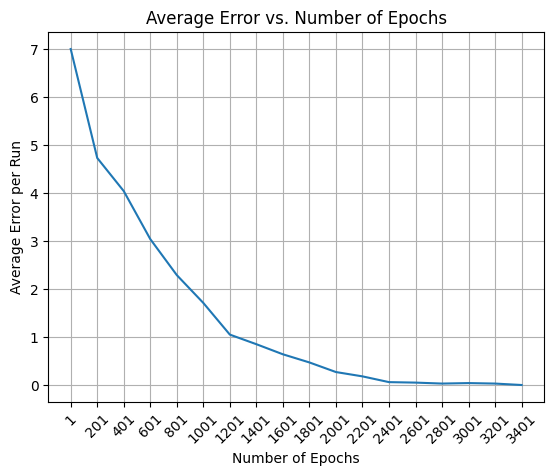

In [73]:
input_size = 8
hidden_size = 3
output_size = 8
learning_rate = 0.1
total_runs = 100

def test_network(epochs, total_runs):
    total_error = 0
    for _ in range(total_runs):
        nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
        nn.train(epochs=epochs, batch_size=8)
        total_error += nn.test_all_cases()
    return total_error / total_runs

# Running the tests
errors_per_epoch = []
epoch_values = list(range(1, 3601, 200))  # from 1 to 2001 with steps of 200
for epochs in epoch_values:
    average_error = test_network(epochs, total_runs)
    errors_per_epoch.append(average_error)
    print('Epochs: ' + str(epochs) + ', Average Error ' + 'str(average_error)')

# Plotting the results
plt.plot(epoch_values, errors_per_epoch)
plt.title('Average Error vs. Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Average Error per Run')
plt.xticks(epoch_values, rotation=45)
plt.grid(True)
plt.show()

This performs a similar experiment, only we see what happens when the weights are initialized not between -1 and 1 but between 0 and 1.

Epochs: 1, Average Error str(average_error)
Epochs: 201, Average Error str(average_error)
Epochs: 401, Average Error str(average_error)
Epochs: 601, Average Error str(average_error)
Epochs: 801, Average Error str(average_error)
Epochs: 1001, Average Error str(average_error)
Epochs: 1201, Average Error str(average_error)
Epochs: 1401, Average Error str(average_error)
Epochs: 1601, Average Error str(average_error)
Epochs: 1801, Average Error str(average_error)
Epochs: 2001, Average Error str(average_error)
Epochs: 2201, Average Error str(average_error)
Epochs: 2401, Average Error str(average_error)
Epochs: 2601, Average Error str(average_error)
Epochs: 2801, Average Error str(average_error)
Epochs: 3001, Average Error str(average_error)
Epochs: 3201, Average Error str(average_error)
Epochs: 3401, Average Error str(average_error)


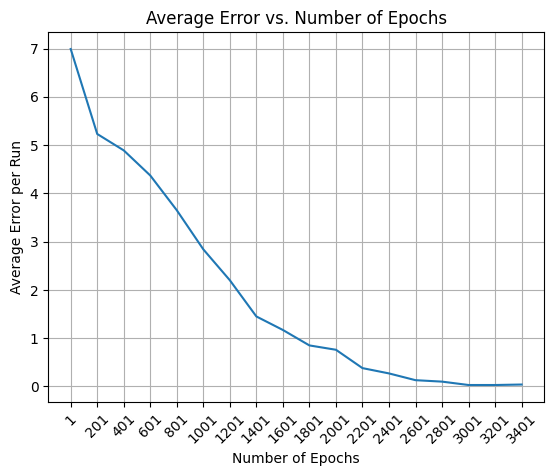

In [76]:
input_size = 8
hidden_size = 3
output_size = 8
learning_rate = 0.1
total_runs = 100

def test_network_positive(epochs, total_runs):
    total_error = 0
    for _ in range(total_runs):
        nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
        nn.weights_input_hidden = np.random.uniform(0, 1, (input_size, hidden_size))
        nn.weights_hidden_output = np.random.uniform(0, 1, (hidden_size, output_size))
        nn.bias_hidden = np.random.uniform(0, 1, (1, hidden_size))
        nn.bias_output = np.random.uniform(0, 1, (1, output_size))

        nn.train(epochs=epochs, batch_size=8)
        total_error += nn.test_all_cases()
    return total_error / total_runs

# Running the tests
errors_per_epoch = []
epoch_values = list(range(1, 3601, 200))  # from 1 to 2001 with steps of 200
for epochs in epoch_values:
    average_error = test_network_positive(epochs, total_runs)
    errors_per_epoch.append(average_error)
    print('Epochs: ' + str(epochs) + ', Average Error ' + 'str(average_error)')

# Plotting the results
plt.plot(epoch_values, errors_per_epoch)
plt.title('Average Error vs. Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Average Error per Run')
plt.xticks(epoch_values, rotation=45)
plt.grid(True)
plt.show()

This experiment shows the effect that different learning rates have on the results.

It shows that any learning rate between 0.11 and 0.31 will suffice, however lower than 0.11 will cause underfitting. There is likely a point at which it will overfit, but throughout the file we used 0.1 which should be fine.

Lambda: 0.01, Average Error 4.24
Lambda: 0.06, Average Error 0.29
Lambda: 0.11, Average Error 0.0
Lambda: 0.16, Average Error 0.0
Lambda: 0.21, Average Error 0.0
Lambda: 0.26, Average Error 0.0


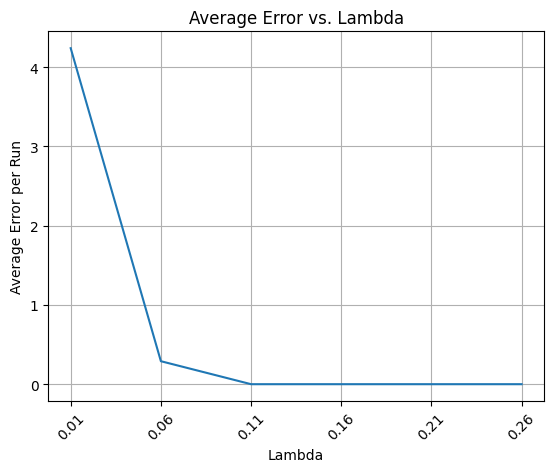

In [88]:
input_size = 8
hidden_size = 3
output_size = 8
learning_rate = 0.1
total_runs = 100

def test_network_lambda(l, total_runs):
    total_error = 0
    for _ in range(total_runs):
        nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
        nn.learning_rate = l
        nn.train(epochs=3200, batch_size=8)
        total_error += nn.test_all_cases()
    return total_error / total_runs

# Running the tests
errors_per_lambda = []
lambda_values = 0.01*np.array(list(range(1, 31, 5)))  # from 1 to 2001 with steps of 200
for l in lambda_values:
    average_error = test_network_lambda(l, total_runs)
    errors_per_lambda.append(average_error)
    print('Lambda: ' + str(l) + ', Average Error ' + str(average_error))
# Plotting the results
plt.plot(lambda_values, errors_per_lambda)
plt.title('Average Error vs. Lambda')
plt.xlabel('Lambda')
plt.ylabel('Average Error per Run')
plt.xticks(lambda_values, rotation=45)
plt.grid(True)
plt.show()


One must note that the evaluations took a little longer as we ran 100 times to account for random initialization of weights.


In [80]:
nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
before = time.time()
nn.train(epochs=3600, batch_size=8)
after = time.time()
print("Running 3600 epochs took: " + str(after-before) + " seconds.")

Running 3600 epochs took: 0.18793082237243652 seconds.


These are the weights going into the hidden layer.
So there is an inner list for each neuron in layer 1, namely 8, then each inner layers contains the weights towards all neurons in layer 2, so 3 for each.

It is difficult to interpret these weights, but a special pattern is present here.
We have 8 neurons with 3 weights, and for each neuron, the 3 weights form a special pattern regarding whether they are positive or negative.

Namely the following:
+-\-
+++
+-+
-\-+
-++
-+-
++-
\-\-\-

It is not a coincidence that we are working with an 8-3-8 network, as 3 is the number of digits one needs to represent each number from 1 to 8 in binary, which is basically what the network has learned to do.

These signs represent the weights from the input to the hidden layer neurons and correspond to the presence of certain features in the input data: if a feature is present in the input, the connected neuron in the hidden layer tends to be active if the weight is positive. Otherwise, if the weight is negative, the neuron tends to be less active when that particular feature is present.

In [75]:
nn.weights_input_hidden

array([[ 2.91982514, -3.35763241, -2.1248681 ],
       [ 2.94947397,  3.39791227,  1.80433336],
       [ 3.1000192 , -1.49222343,  2.06030687],
       [-1.28547292, -4.13956406,  2.48325858],
       [-2.3615627 ,  1.43270429,  4.1594037 ],
       [-4.20820202,  2.6235516 , -1.39124421],
       [ 1.52830219,  2.78432001, -3.86302428],
       [-2.74322442, -2.88106287, -3.09523815]])

Weights going from the hidden layer to the output layer.
The opposite from before, 3 inner lists, with 8 values each.

These weights follow the exact same pattern, only transposed (the ith index of each of the 3 lists).



In [62]:
nn.weights_hidden_output

array([[ 4.69077025,  2.68553756,  2.95220066, -2.52605349, -4.02413929,
        -6.78014739,  2.94156568, -4.2393981 ],
       [-5.13801198,  3.02057865, -2.24966125, -6.47240708,  2.84796816,
         4.50134076,  3.81567733, -4.02243242],
       [-4.00538868,  2.20772919,  2.55298289,  4.78508814,  5.05563436,
        -3.23512916, -6.08309887, -4.3779633 ]])

The biases for the nodes in the hidden layer.

The biases are more difficult to interpret, we are not sure what to say about this.

In [63]:
nn.bias_hidden

array([[-0.27126739, -0.205755  , -0.00031922]])

The biases for the nodes in the output layer.

In [65]:
nn.bias_output

array([[-2.07670118, -6.42667141, -4.20362443, -2.4448086 , -5.59535149,
        -1.8035778 , -4.16050587,  2.26167008]])